In [1]:
import numpy as np
from glob import glob
import tensorflow as tf
from train import Trainer
from random import shuffle
from scipy.io import loadmat
from matplotlib import pyplot as plt
from inference import read_image, infer
from src.utils import (
    decode_segmask, get_overlay,
    plot_samples_matplotlib
)

## Training

In [2]:
config = {
    'wandb_api_key': 'kjbckajsbdksjbdkajsbkdasbkdj',
    'project_name': 'deeplabv3-plus',
    'experiment_name': 'human-parsing-resnet-50-backbone',
    'train_dataset_configs': {
        'images': sorted(glob(
            './dataset/instance-level_human_parsing/instance-level_human_parsing/Training/Images/*'
        )),
        'labels': sorted(glob(
            './dataset/instance-level_human_parsing/instance-level_human_parsing/Training/Category_ids/*'
        )),
        'height': 512, 'width': 512, 'batch_size': 8
    },
    'val_dataset_configs': {
        'images': sorted(glob(
            './dataset/instance-level_human_parsing/instance-level_human_parsing/Validation/Images/*'
        )),
        'labels': sorted(glob(
            './dataset/instance-level_human_parsing/instance-level_human_parsing/Validation/Category_ids/*'
        )),
        'height': 512, 'width': 512, 'batch_size': 8
    },
    'strategy': tf.distribute.OneDeviceStrategy(device="/gpu:0"),
    'num_classes': 20, 'height': 512, 'width': 512,
    'backbone': 'resnet50', 'learning_rate': 0.0001,
    'checkpoint_path': 'deeplabv3-plus-human-parsing-resnet-50-backbone.h5',
    'epochs': 100
}

In [3]:
# trainer = Trainer(config)
# trainer.connect_wandb()
# history = trainer.train()

## Inference

In [4]:
model_file = '/Users/soumikrakshit/Workspace/aws_ssh/deeplabv3-plus-human-parsing-resnet-50-backbone.h5'
color_map_file = '/Users/soumikrakshit/Workspace/Datasets/instance-level_human_parsing/human_colormap.mat'
train_images = glob(
    '/Users/soumikrakshit/Workspace/Datasets/instance-level_human_parsing/Training/Images/*'
)
val_images = glob(
    '/Users/soumikrakshit/Workspace/Datasets/instance-level_human_parsing/Validation/Images/*'
)
test_images = glob(
    '/Users/soumikrakshit/Workspace/Datasets/instance-level_human_parsing/Testing/Images/*'
)

print('Number of Training images: {}'.format(len(train_images)))
print('Number of Validation images: {}'.format(len(val_images)))
print('Number of Testing images: {}'.format(len(test_images)))

Number of Training images: 28280
Number of Validation images: 5000
Number of Testing images: 5000


In [5]:
colormap=loadmat(color_map_file)['colormap']
colormap = colormap * 100
colormap = colormap.astype(np.uint8)
colormap

array([[ 0,  0,  0],
       [50,  0,  0],
       [99,  0,  0],
       [ 0, 33,  0],
       [66,  0, 19],
       [99, 33,  0],
       [ 0,  0, 33],
       [ 0, 46, 86],
       [33, 33,  0],
       [ 0, 33, 33],
       [33, 19,  0],
       [20, 33, 50],
       [ 0, 50,  0],
       [ 0,  0, 99],
       [19, 66, 86],
       [ 0, 99, 99],
       [33, 99, 66],
       [66, 99, 33],
       [99, 99,  0],
       [99, 66,  0]], dtype=uint8)

In [6]:
def plot_predictions(images_list, size, colormap):
    for image_file in images_list:
        image_tensor = read_image(
            image_file, (
                config['train_dataset_configs']['height'],
                config['train_dataset_configs']['height']
            )
        )
        prediction_mask = infer(
            image_tensor=image_tensor,
            model_file=model_file
        )
        prediction_colormap = decode_segmask(
            prediction_mask, colormap,
            config['num_classes']
        )
        overlay = get_overlay(image_tensor, prediction_colormap)
        plot_samples_matplotlib(
            [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
        )

### Inference on Train Images

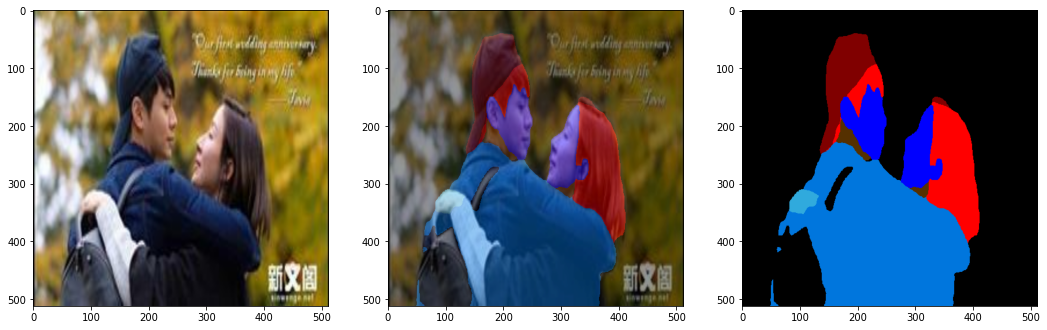

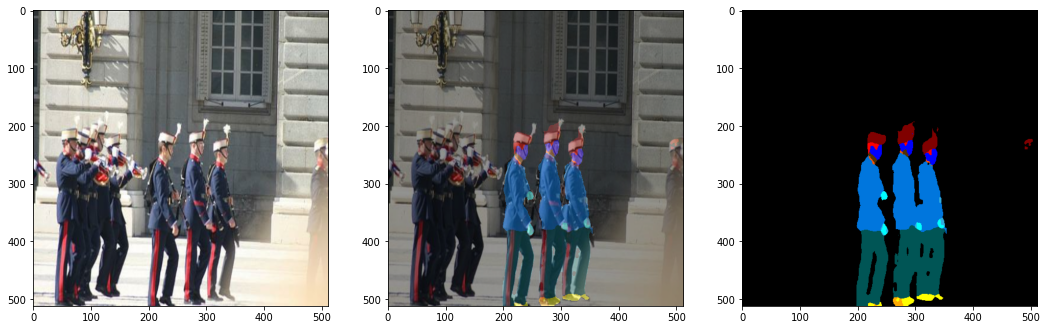

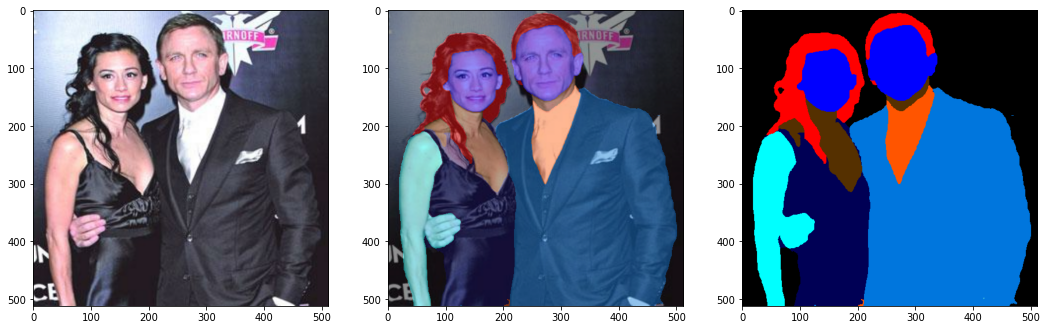

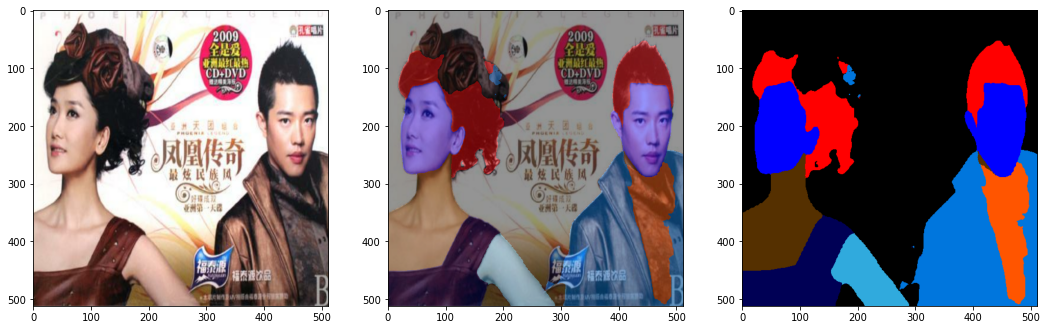

In [7]:
plot_predictions(
    train_images[:4], (
        config['train_dataset_configs']['height'],
        config['train_dataset_configs']['height']
    ), colormap
)

### Inference on Validation Images

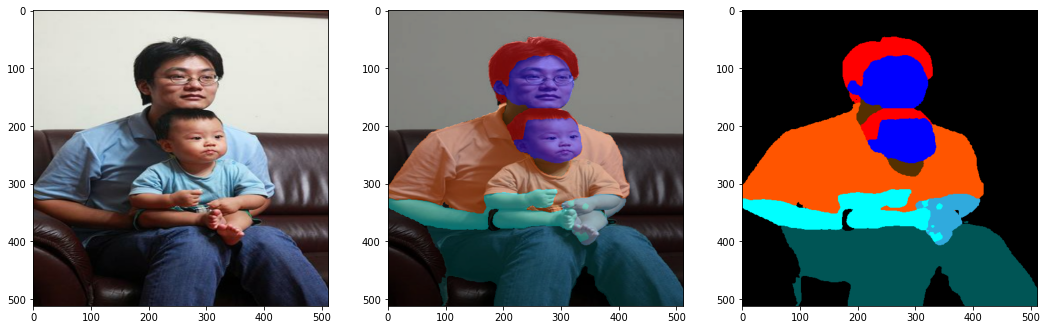

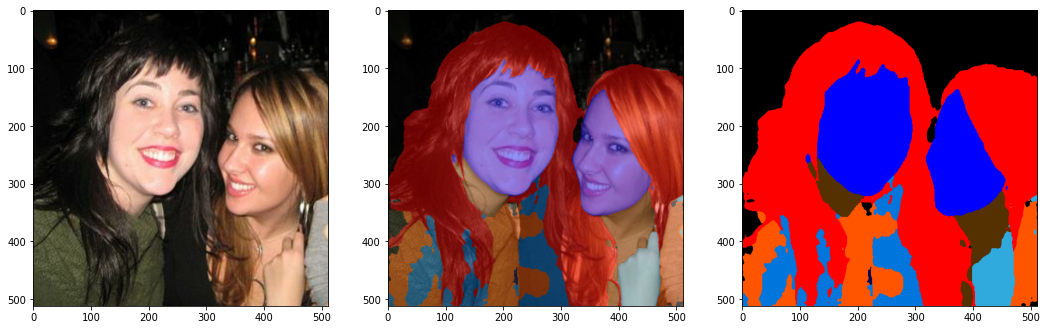

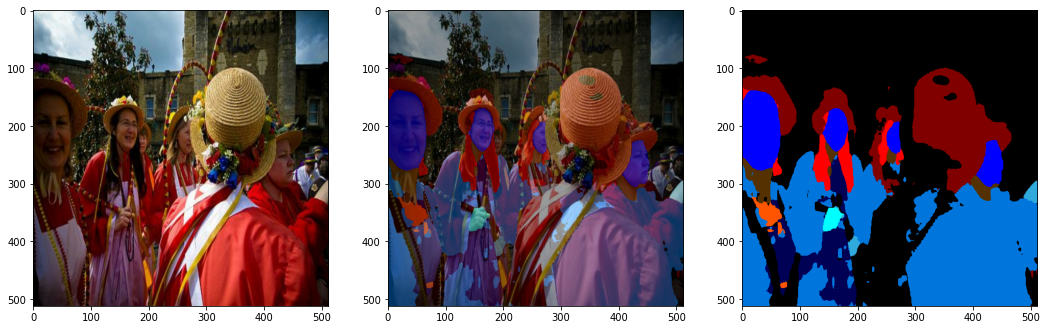

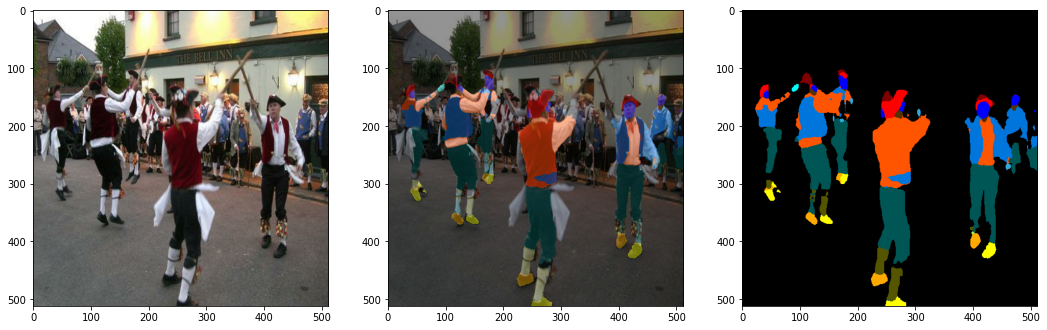

In [8]:
plot_predictions(
    val_images[:4], (
        config['val_dataset_configs']['height'],
        config['val_dataset_configs']['height']
    ), colormap
)

### Inference on Test Images

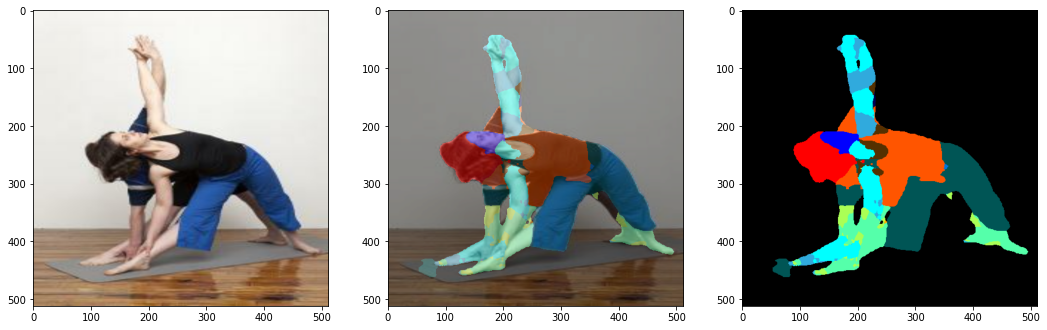

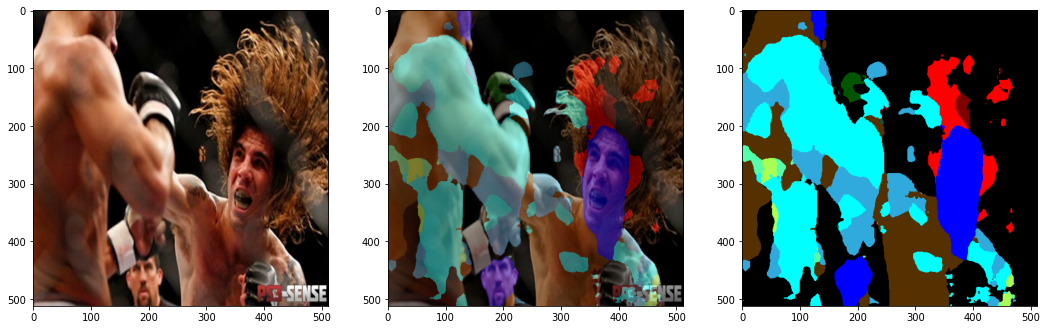

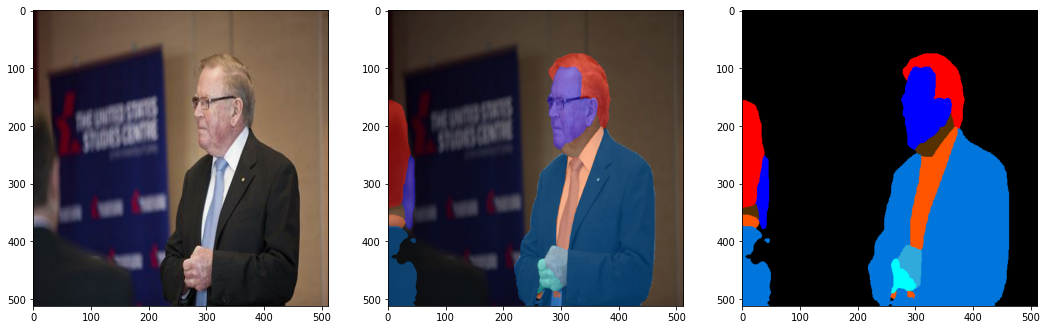

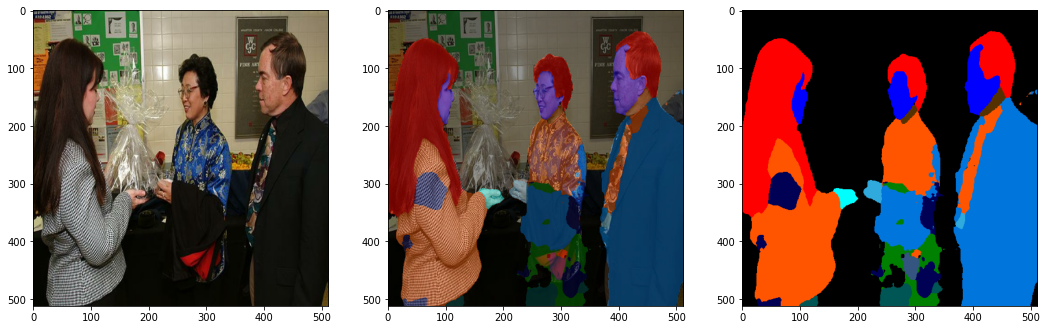

In [9]:
plot_predictions(
    test_images[:4], (
        config['val_dataset_configs']['height'],
        config['val_dataset_configs']['height']
    ), colormap
)